In [1]:
## Imports Packages
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
pd.options.display.max_seq_items = 2000 ## expading all output data
from pandas.api.types import is_numeric_dtype
import scipy as sy
from sklearn import preprocessing
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from numpy import linalg as LA
from sklearn.preprocessing import StandardScaler
from pandas.api.types import is_numeric_dtype

load_csv:
   
 Parameters:
 file_name - a prameter that the function gets

 Returns:
 returns a data frame

In [2]:
def load_csv(file_name):
    df = pd.read_csv(file_name,encoding = 'unicode_escape')
    return df

In [3]:
file_name = '4BC.csv'
bc_df = load_csv(file_name)
bc_df

,ï»¿id,B.C.,FF,Rs,Rsh,VOC(mV),jsc(ÂµA/cm2)
0,1,Ag,42.050778,1201.02073,3.207157e+06,313.589943,9.0800
1,2,Ag,31.448339,23063.72733,1.139941e+06,305.736250,14.4411
2,3,Ag,44.528443,77754.33149,2.474440e+06,403.290236,14.9000
3,4,Ag,42.470062,60349.26229,2.323489e+06,402.432026,14.8000
4,5,Ag,42.710457,141620.04100,2.582384e+06,407.892966,13.5000
...,...,...,...,...,...,...,...
544,545,Ni,28.385630,484276.00640,2.577343e+06,282.041320,6.6600
545,546,Ni,32.167790,296946.79780,2.922597e+06,270.941295,7.6000
546,547,Ni,25.675577,94206.71899,3.697029e+05,70.500000,7.7500
547,548,Ni,30.562862,355756.97060,2.767568e+06,280.508226,8.2500


split_columns:
   
 Parameters:
 bc_df - a prameter that the function gets

 Returns:
 returns a data frame splited by columns

In [4]:
## Getting all the columns except id,B.C
def split_columns(bc_df):
    df_col_list = bc_df.columns[2:]
    df_col_list
    y = bc_df.loc[:,['B.C.']].values # B.C column (target)
    x = bc_df.loc[:,df_col_list].values # Seperating all the irrelevant values
    return x , y 

Normilizing_data:
   
 Parameters:
 df - a prameter that the function gets

 Returns:
 returns a normalized data frame by StandardScaler

In [5]:
## Normilizing the data
def Normilizing_data(df):
    x, _ = split_columns(df)
    bc_df_norm = StandardScaler().fit_transform(x)
    return bc_df_norm

In [6]:
bc_arr_norm = Normilizing_data(bc_df)

In [7]:
## performing the PCA
pca = PCA(n_components=3)
pca_result = pca.fit_transform(bc_arr_norm)

PC_Table:
   
 Parameters:
 pca_result - a prameter that the function gets

 Returns:
 returns a pca data frame

In [8]:
## Constructing new df which holds the results of the PCA.
def PC_Table(pca_result):
    pca_df = pd.DataFrame()
    pca_df['PC-1'] = pca_result[:,0]
    pca_df['PC-2'] = pca_result[:,1] 
    pca_df['PC-3'] = pca_result[:,2]
    pca_df = pd.concat([pca_df, bc_df[['B.C.']]], axis = 1)
    return pca_df

In [9]:
pca_df = PC_Table(pca_result)

plot_3D:
   
 Parameters:
 pca_df - a prameter that the function gets

 Returns:
 returns a graph of the pca data frame

In [10]:
## 3D scatter
def plot_3D(pca_df):
    fig = plt.figure(1, figsize=(8, 6))
    ax = Axes3D(fig, elev=-150, azim=110)

    targets = ['Ni','Cu','Ag','Co']
    colors = ['red', 'yellow', 'blue','green']
    for target, color in zip(targets,colors):
        indicesToKeep = pca_df['B.C.'] == target
        ax.scatter(
            xs = pca_df.loc[indicesToKeep,"PC-1"],
            ys = pca_df.loc[indicesToKeep,"PC-2"],
            zs = pca_df.loc[indicesToKeep,"PC-3"],
            c = color,
            s = 15
        )
    ax.set_xlabel("PC-1")
    ax.set_ylabel("PC-2")
    ax.set_zlabel("PC-3")
    ax.legend(targets)
    plt.show()

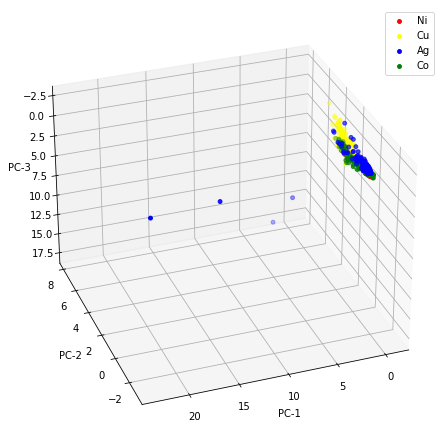

In [11]:
plot_3D(pca_df)

In [12]:
# Calculate the variance explained by priciple components and all three together
print('Variance of each component:', pca.explained_variance_ratio_)
print('\nThe amount of variance explained by each of the selected components:')
print('1. PCA-1: {}%'.format(pca.explained_variance_ratio_[0]*100))
print('2. PCA-2: {}%'.format(pca.explained_variance_ratio_[1]*100))
print('3. PCA-3: {}%'.format(pca.explained_variance_ratio_[2]*100))
print('\nTotal Variance Explained: {}%'.format(sum(list(pca.explained_variance_ratio_))*100))

Variance of each component: [0.29588819 0.25891229 0.198978  ]

The amount of variance explained by each of the selected components:
1. PCA-1: 29.588818890093776%
2. PCA-2: 25.89122912150837%
3. PCA-3: 19.897799511335602%

Total Variance Explained: 75.37784752293774%


In [13]:
cov_matrix = pca_df.cov()
cov_matrix

,PC-1,PC-2,PC-3
PC-1,1.482141e+00,3.306358e-16,2.042162e-16
PC-2,3.306358e-16,1.296924e+00,-1.555933e-16
PC-3,2.042162e-16,-1.555933e-16,9.967055e-01


In [14]:
w,v = LA.eig(cov_matrix)
print('w is: ', w)
print('v is:\n ', v)

w is:  [1.48214065 1.29692379 0.99670547]
v is:
  [[ 1.00000000e+00  1.78512778e-15 -4.20686864e-16]
 [ 0.00000000e+00 -1.00000000e+00  5.22365960e-16]
 [ 0.00000000e+00  8.92171174e-16  1.00000000e+00]]


## Removing Outliers:

outlier_detection_iqr:

Parameters:
dataframe - the function gets dataframe

Returns: df with filled NaN on outlier cells

In [15]:
def outlier_detection_iqr(dataframe):
    clean_df = dataframe.copy()
    for col in clean_df:
        if is_numeric_dtype(clean_df[col]): # is numeric 
            Q1 = np.percentile(clean_df[col],25)
            Q3 = np.percentile(clean_df[col],75)
            IQR = Q3 - Q1
            IQR_range = IQR * 1.5
            clean_df.loc[ (clean_df[col] < Q1 - IQR_range) | (clean_df[col] > Q3 + IQR_range), [col]] = np.nan
            
    return clean_df

oulier_detection_zscore:

Parameters:
df - the function gets dataframe

Returns: df with filled NaN on outlier cells

In [16]:
def oulier_detection_zscore(df):
    clean_df = df.copy()
    for col in clean_df:
        if is_numeric_dtype(clean_df[col]): 
            z_score = (clean_df[col] - clean_df[col].mean()) / clean_df[col].std()
            clean_df.loc[(abs(z_score) > 3) ,[col]] = np.nan
    return clean_df

normalize:

Parameters:
dataframe - the function gets dataframe

Returns:
returns a dataframe after normalizing each column with minmax[0, 1]

In [17]:
def normalize(df):
    result = df.copy()
    for feature_name in df.columns:
        max_value = df[feature_name].max()
        min_value = df[feature_name].min()
        result[feature_name] = (df[feature_name] - min_value) / (max_value - min_value)
    return result

In [18]:
x, _ = split_columns(bc_df)
df_x = pd.DataFrame(x, columns = ['FF', 'Rs', 'Rsh', 'VOC(mV)', 'jsc(µA/cm2)'])
clean_df = normalize(df_x)
clean_df = oulier_detection_zscore(clean_df)

remove_corrupt_rows:
    
Parameters:
dataframe - the function gets dataframe

Returns:
returns a clean dataframe without rows contains NaN values

In [19]:
def remove_corrupt_rows(dataframe):
    clean_df = pd.DataFrame()
    clean_df = dataframe.dropna(axis=0, how = 'any')
    return clean_df

In [20]:
# no_Nan_bc_df is the cleaned df after remove outliers
no_Nan_bc_df = remove_corrupt_rows(clean_df)
no_Nan_bc_df = no_Nan_bc_df.reset_index(drop = True)

In [21]:
## performing the PCA
pca_SS = PCA(n_components=3)
pca_result_SS = pca_SS.fit_transform(no_Nan_bc_df)

PC_Table_2:
   
 Parameters:
 pca_result - a prameter that the function gets

 Returns:
 returns a pca data frame

In [22]:
## Constructing new df which holds the results of the PCA.
def PC_Table_2(pca_result_SS):
    pca_df_ss = pd.DataFrame()
    pca_df_ss['PC-1'] = pca_result_SS[:,0]
    pca_df_ss['PC-2'] = pca_result_SS[:,1] 
    pca_df_ss['PC-3'] = pca_result_SS[:,2]
    pca_df_ss = pd.concat([pca_df_ss, bc_df[['B.C.']]], axis = 1)
    return pca_df_ss

In [23]:
## Constructing new df which holds the results of the PCA.
pca_df_SS = PC_Table(pca_result_SS)
pca_df_SS = pca_df_SS.dropna()

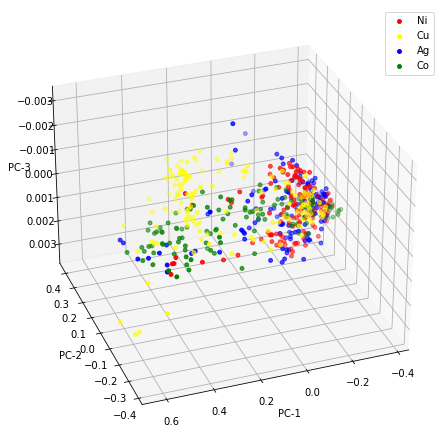

In [24]:
plot_3D(pca_df_SS)

Why all five are outliers?
1. Indexes 89 and 91 are outliers because the are the minimum in 'FF' and 'VOC' columns
2. Index 100 is an outlier because it is the maximum in the 'FF' column (above outlier_detection_iqr with 75)
3. Index 104 is an outlier because it is the minimum in the 'Rsh' column (under outlier_detection_iqr with 25)
4. Index 391 is an outlier because it is the maximum in the 'jsc' column (above outlier_detection_iqr with 75)

In [25]:
# Calculate the variance explained by priciple components and all three together
print('Variance of each component:', pca_SS.explained_variance_ratio_)
print('\nThe amount of variance explained by each of the selected components:')
print('1. PCA-1: {}%'.format(pca_SS.explained_variance_ratio_[0]*100))
print('2. PCA-2: {}%'.format(pca_SS.explained_variance_ratio_[1]*100))
print('3. PCA-3: {}%'.format(pca_SS.explained_variance_ratio_[2]*100))
print('\nTotal Variance Explained: {}%'.format(sum(list(pca_SS.explained_variance_ratio_))*100))

Variance of each component: [8.26430185e-01 1.73559326e-01 9.57941293e-06]

The amount of variance explained by each of the selected components:
1. PCA-1: 82.6430185479893%
2. PCA-2: 17.35593260300647%
3. PCA-3: 0.0009579412933584985%

Total Variance Explained: 99.99990909228913%


In [26]:
cov_matrix_SS = pca_df_SS.cov()
print(cov_matrix_SS)
print()
w_SS,v_SS = LA.eig(cov_matrix_SS)
print('w is: ', w_SS)
print('v is:\n ', v_SS)

              PC-1          PC-2          PC-3
PC-1  6.149845e-02 -1.247442e-17  3.898255e-20
PC-2 -1.247442e-17  1.291534e-02  8.121365e-21
PC-3  3.898255e-20  8.121365e-21  7.128479e-07

w is:  [6.14984485e-02 1.29153430e-02 7.12847913e-07]
v is:
  [[ 1.00000000e+00 -2.56764483e-16 -6.33885940e-19]
 [ 0.00000000e+00 -1.00000000e+00 -1.05154639e-18]
 [ 0.00000000e+00 -1.05154639e-18  1.00000000e+00]]


## Running T-SNE on the cleaned df without outliers

In [27]:
tsne = TSNE(n_components=3, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(no_Nan_bc_df)
# tsne_results = PC_Table(tsne_results)
tsne_results = pd.DataFrame(tsne_results, columns = ['t-SNE-1', 't-SNE-2', 't-SNE-3'])
tsne_results = pd.concat([tsne_results, bc_df[['B.C.']]], axis = 1)
tsne_results = tsne_results.dropna()

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 535 samples in 0.001s...
[t-SNE] Computed neighbors for 535 samples in 0.010s...
[t-SNE] Computed conditional probabilities for sample 535 / 535
[t-SNE] Mean sigma: 0.037330
[t-SNE] KL divergence after 250 iterations with early exaggeration: 62.827278
[t-SNE] KL divergence after 300 iterations: 0.973607


plot_3D_tSNE:
   
 Parameters:
 pca_df - a prameter that the function gets

 Returns:
 returns a graph of the t-sne data frame

In [28]:
## 3D scatter
def plot_3D_tSNE(tsne_results):
    fig = plt.figure(1, figsize=(8, 6))
    ax = Axes3D(fig, elev=-150, azim=110)

    targets = ['Ni','Cu','Ag','Co']
    colors = ['red', 'yellow', 'blue','green']
    for target, color in zip(targets,colors):
        indicesToKeep = pca_df['B.C.'] == target
        ax.scatter(
            xs = tsne_results.loc[indicesToKeep,"t-SNE-1"],
            ys = tsne_results.loc[indicesToKeep,"t-SNE-2"],
            zs = tsne_results.loc[indicesToKeep,"t-SNE-3"],
            c = color,
            s = 15
        )
    ax.set_xlabel("t-SNE-1")
    ax.set_ylabel("t-SNE-2")
    ax.set_zlabel("t-SNE-3")
    ax.legend(targets)
    plt.show()

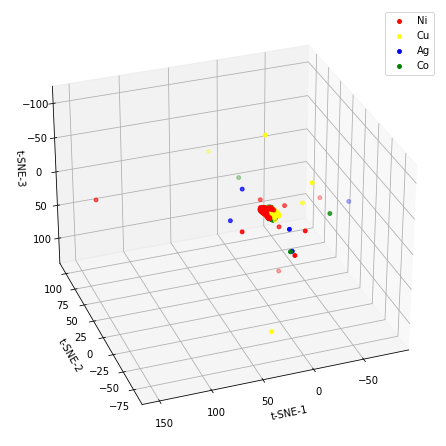

In [29]:
plot_3D_tSNE(tsne_results)

What is the difference between PCA and T-SNE?
1. PCA is a deterministic algorithm which means every time we run the PCA algorithm we get the same result as opposed to TSNE which is non-deterministic randomised algorithm.
2. PCA works by rotating the vectors for preserving variance, on the other hand, TSNE works by minimizing the distance between the point in a gaussian.

Are we getting the same picture each time?

1. In T-SNE, we are getting different results(Graph) on each running of the algorithm. Due to the fact it is randomised algorithm.